# SpatioTemporal Pattern Network (STPN) Tutorial 
This Python Notebook provides a tutorial on using [SpatioTemporal Pattern Network (STPN)](https://pypi.org/project/STPN/#description) for binary and multi-target(/regression) prediction

## Installing STPN from PyPi

In [5]:
# Install STPN
!pip install stpn

## Required imports

In [6]:
# Imports
from STPN.util import *
import pandas as pd

## Define STPN parameters

In [7]:
# Define parameters
depth = 2
tau = 1

## Load data

In [9]:
# Download sample data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mPDPcyc3Tj-8CqFBIBn55vDXOiwQWaLo' -O datatest.csv

--2022-04-05 04:13:50--  https://docs.google.com/uc?export=download&id=1mPDPcyc3Tj-8CqFBIBn55vDXOiwQWaLo
Resolving docs.google.com (docs.google.com)... 74.125.128.102, 74.125.128.101, 74.125.128.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.128.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2devqj2quvnpf48k2uq8jrmat1rjp3fa/1649132025000/13592117086881866627/*/1mPDPcyc3Tj-8CqFBIBn55vDXOiwQWaLo?e=download [following]
--2022-04-05 04:13:50--  https://doc-0c-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2devqj2quvnpf48k2uq8jrmat1rjp3fa/1649132025000/13592117086881866627/*/1mPDPcyc3Tj-8CqFBIBn55vDXOiwQWaLo?e=download
Resolving doc-0c-6o-docs.googleusercontent.com (doc-0c-6o-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to doc-0c-6o-docs.googleusercontent.com (doc-0c-6o-docs.goog

In [10]:
# Load data
data = pd.read_csv("datatest.csv",index_col=0)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


## Compute boundaries for discretization

discretize() have 3 discretization modes:

- **uniform:** Discretize data into uniform ranges
- **MEP:** Maximum Entropy Partitioning
- **unique:** Discretize by each unique value in the data (not recommended for floats)

[21.04166667 21.88333333 22.725      23.56666667]


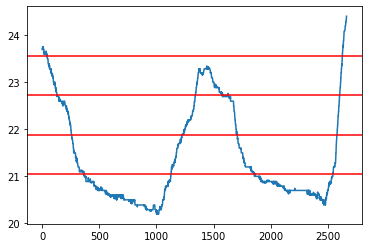

In [11]:
# Generate and visualize boundaries
boundaries = discretize(data['Temperature'].values, mode="uniform", numparts=5)
print(boundaries)

visualize_bounds(data['Temperature'].values, boundaries)

## Symbolize data using defined boundaries

In [12]:
# Symbolize data using defined boundaries
symbolized_data = symbolize(data['Temperature'].values, boundaries)
symbolized_data

array(['5', '5', '5', ..., '5', '5', '5'], dtype='<U1')

## Generate *state* using symbolized data

In [13]:
# Generate state(symbolized data with defined depth) using symbolized data
state = state_gen(symbolized_data, depth=depth, tau=tau)
state[:10]

['5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5',
 '5,5,5']

In [ ]:
# (optional) Re-define state's element to single "symbol" representation
# Function coming soon

## Prepare prediction target

**Note:** For demonstration purpose, this tutorial is using the same data for training and testing/prediction!

In [14]:
# Define prediction target
occupancy = data['Occupancy'].values # Classification (Binary)
occupancy[:10]
# Use symbolized_data(temperature) # Regression (Multi-class Classification)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# Trim state with depth (see figure for clarification)
occupancy = occupancy[depth+tau:]
temperature = symbolized_data[depth+tau:]

assert len(temperature)==(len(data['Temperature'].values)-depth-tau)
assert len(occupancy)==(len(data['Temperature'].values)-depth-tau)

assert len(temperature)==len(state)
assert len(occupancy)==len(state)

## Learn the transition matrix

In this tutorial, we use ***occupancy*** as the binary target and the ***temperature*** as the multi-target.

compute_TM() returns:
- ***Transition matrix (TM)***
- ***TM element counts***
- ***Unique targets***

In [16]:
# Construct state-occupancy Trans. Mat.
TM_binary, TM_binary_c, binary_targets = compute_TM(state, occupancy, True)
print("TM_binary:",TM_binary)
print("TM_binary_c:",TM_binary_c)
print("binary_targets:",binary_targets)

# Construct state-temperature Trans. Mat.
TM_multi, TM_multi_c, multi_targets = compute_TM(state, temperature, True)

TM_binary: {'1,1,1': array([0.9000694, 0.0999306]), '1,1,2': array([0.5, 0.5]), '1,2,1': array([1., 0.]), '1,2,2': array([0., 1.]), '2,1,1': array([1., 0.]), '2,2,1': array([1., 0.]), '2,2,2': array([0.67733333, 0.32266667]), '2,2,3': array([0., 1.]), '2,3,3': array([0., 1.]), '3,2,2': array([1., 0.]), '3,3,2': array([1., 0.]), '3,3,3': array([0.25706941, 0.74293059]), '3,3,4': array([0., 1.]), '3,4,3': array([0., 1.]), '3,4,4': array([0., 1.]), '4,3,3': array([0., 1.]), '4,3,4': array([0., 1.]), '4,4,3': array([0., 1.]), '4,4,4': array([0.08358209, 0.91641791]), '4,4,5': array([0., 1.]), '4,5,4': array([0., 1.]), '4,5,5': array([0., 1.]), '5,4,4': array([0., 1.]), '5,4,5': array([0., 1.]), '5,5,4': array([0., 1.]), '5,5,5': array([0., 1.])}
TM_binary_c: {'1,1,1': [1297, 144], '1,1,2': [2, 2], '1,2,1': [2, 0.0], '1,2,2': [0.0, 2], '2,1,1': [4, 0.0], '2,2,1': [2, 0.0], '2,2,2': [254, 121], '2,2,3': [0.0, 2], '2,3,3': [0.0, 2], '3,2,2': [2, 0.0], '3,3,2': [2, 0.0], '3,3,3': [100, 289], '

## Perform inferencing



In [19]:
# Inferencing using state-occupancy Trans. Mat.
occ_pred = inference(state, TM_binary, binary_targets, mode="ffill", verbose=1)
print(occ_pred[:10])

# Inferencing using state-temperature Trans. Mat.
temp_pred = inference(state, TM_multi, multi_targets, mode="ffill", verbose=1)

[1 1 1 1 1 1 1 1 1 1]


## Evaluate inference results

***eval()*** returns a dictionary containing number of metrics which gives a thorough evaluation of the inference results (credits to [sklearn.metrics.classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).


***STPN.util*** also provides ***plot_confusion_matrix()*** which plots a confusion matrix of the inference results.

# Binary Occupancy
              precision    recall  f1-score   support

           0   0.854258  0.924395  0.887943      1693
           1   0.845783  0.724458  0.780434       969

    accuracy                       0.851615      2662
   macro avg   0.850020  0.824426  0.834188      2662
weighted avg   0.851173  0.851615  0.848808      2662

Class Accuracies: {'0': 0.9243945658594211, '1': 0.7244582043343654}




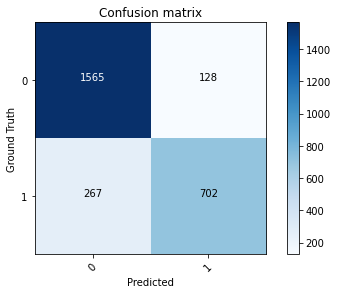



# Multi-target Temperature
              precision    recall  f1-score   support

           1   0.995871  0.998620  0.997243      1449
           2   0.989501  0.979221  0.984334       385
           3   0.982587  0.982587  0.982587       402
           4   0.982709  0.982709  0.982709       347
           5   0.987342  0.987342  0.987342        79

    accuracy                       0.990984      2662
   macro avg   0.987602  0.986096  0.986843      2662
weighted avg   0.990975  0.990984  0.990975      2662





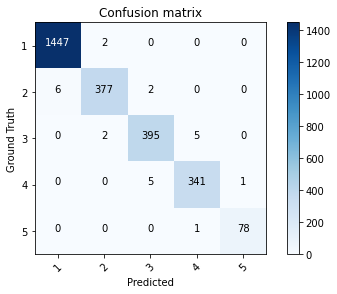

In [20]:
# Evaluate inference results
print("# Binary Occupancy")
occ_results = eval(occupancy, occ_pred, binary_targets, save_resu=False, print_cls_acc=True)
plot_confusion_matrix(occ_results['cm'],binary_targets)

print("\n")
print("# Multi-target Temperature")
temp_results = eval(temperature, temp_pred, multi_targets, save_resu=False, print_cls_acc=False)
plot_confusion_matrix(temp_results['cm'],multi_targets)